## Notebook 2: Procesamiento de datasets 

Para este Notebook se estara utilizando el conjunto de datos de las series y peliculas de Netflix, el cual se puede obtener descarg&aacute;ndolo del siguiente enlace.

<p>Click para descargar el conjunto de datos <a href="https://www.kaggle.com/datasets/shivamb/netflix-shows">Netflix Movies and TV Shows Dataset</a>.</p>


El conjunto de datos contiene un listado de todas las películas y programas de televisión disponibles en la plataforma, junto con detalles como el t&iacute;tulo del programa/serie, director, el reparto, pa&iacute;s de origen, fecha en que se agreg&oacute;, el año de estreno, clasificaci&oacute;n, duraci&oacute;n, g&eacute;nero y descripci&oacute;n.

Para poder explorar el conjunto de datos, primero se importan las librer&iacute;as que se utilizaran para el notebook

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

Listamos las primeras 15 columnas para poder conocer el tipo de datos que contiene el conjunto y conocerlo a profundidad.

In [29]:
netflix_titles = pd.read_csv("netflix_titles.csv")
netflix_titles

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Se puede apreciar por medio de estas gr&aacute;ficas que la cantidad de pel&iacute;culas es mucho mayor al n&uacute;mero de series al momento de crear este conjunto de datos.

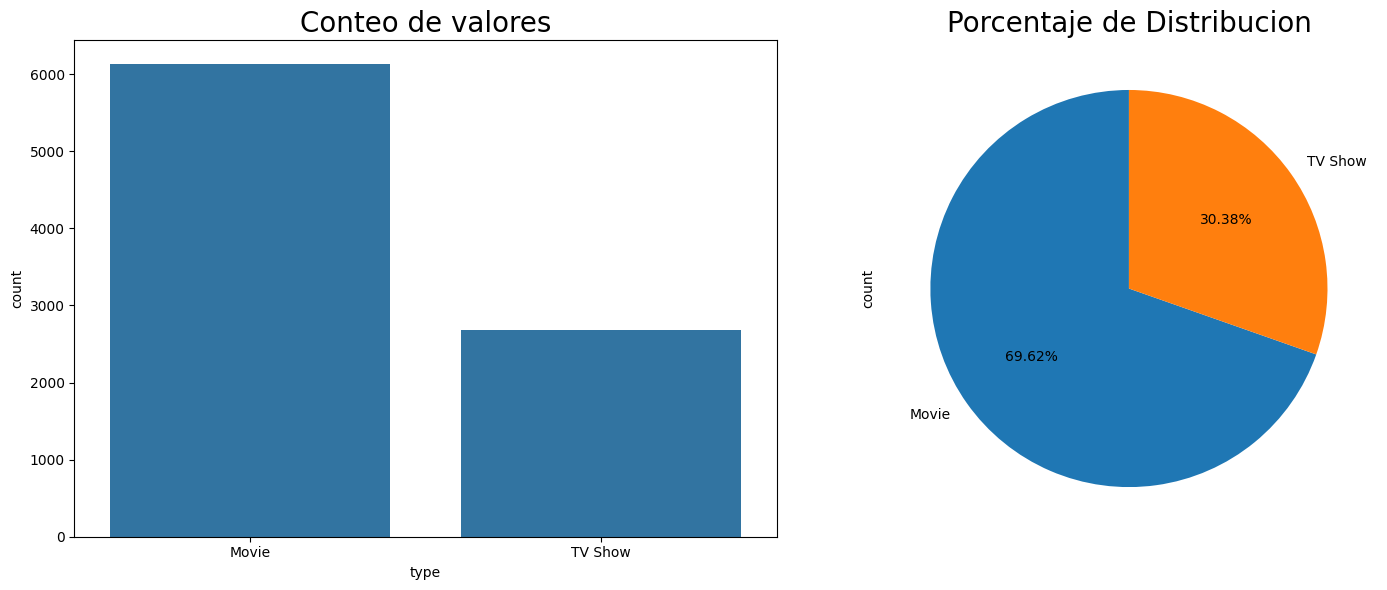

In [30]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# Diagrama de recuento
graph = sns.countplot(x = 'type', data = netflix_titles, ax=ax[0])
graph.set_title('Conteo de valores', size=20)

# Grafica de pastel
netflix_titles['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], figsize=(15,6),startangle=90)
plt.title('Porcentaje de Distribucion', size=20)

plt.tight_layout()
plt.show()

Explorando los datos podemos visualizar qu&eacute; titulos en la plataforma son el m&aacute;s antiguo y el m&aacute; reciente hasta la fecha que se guardaron los datos, por lo cual, el titulo m&aacute;s antiguo es de 1925, mientras que el m&aacute;s reciente es del 2021. 

In [31]:

print(f'Oldest release year : {netflix_titles.release_year.min()}')
print(f'Latest release year : {netflix_titles.release_year.max()}')

Oldest release year : 1925
Latest release year : 2021


Por medio de las gr&aacute;ficas podemos ver un tpo 10 de los pa&iacute;ses con mayor n&uacute;mero de pel&iacute;culas y series de televisi&oacute;n, 

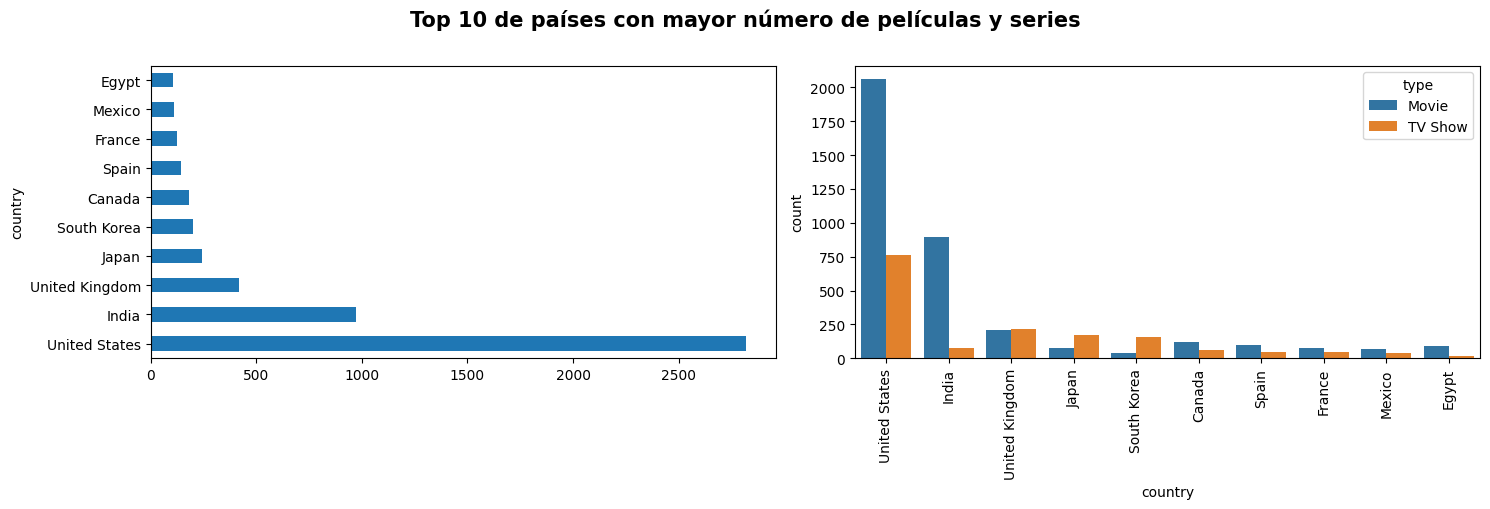

In [32]:

fig,ax = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Top 10 de países con mayor número de películas y series', weight='bold', size=15, y=1.01)

# Analisis Univariado
netflix_titles['country'].value_counts().nlargest(10).plot(kind='barh', ax=ax[0])

# Analisis bivariante
graph = sns.countplot(x="country", data=netflix_titles, hue='type', order=netflix_titles['country'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Se pueden apreciar los años con mayor lanzamiento de pel&iacute;culas, siendo el 2017 y 2018 los que tuvieron una mayor distribucion de lanzamientos.

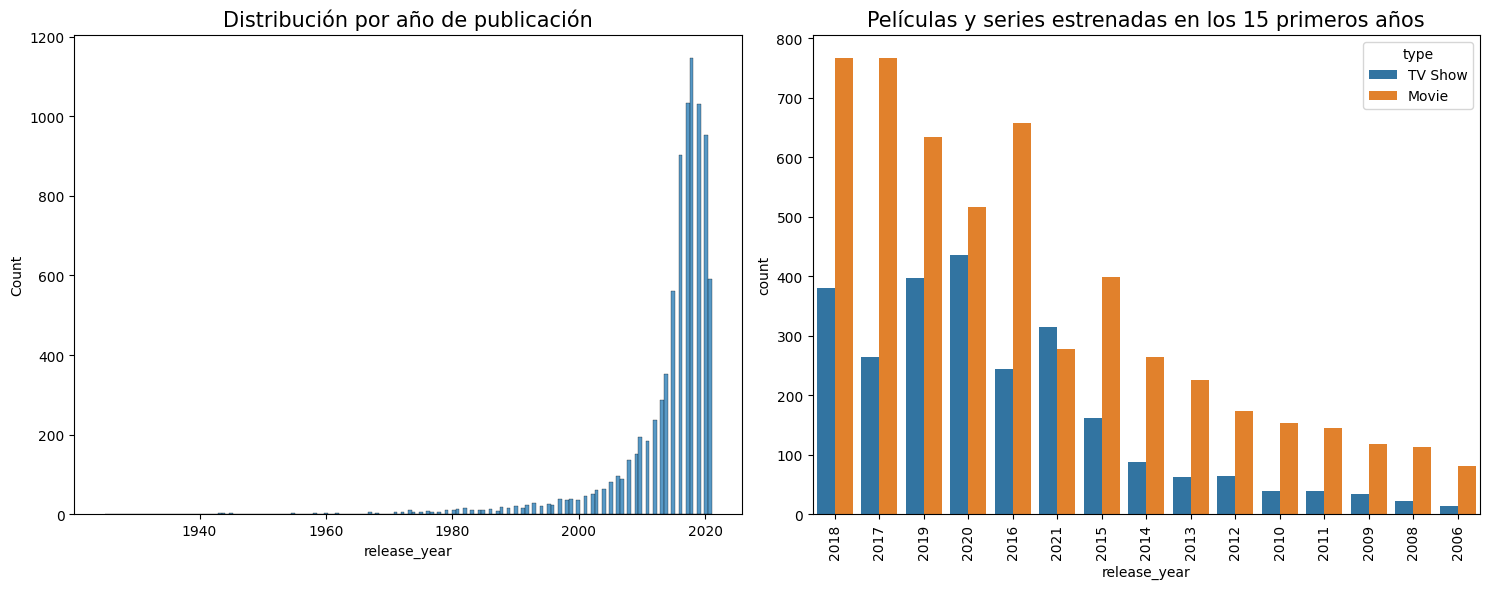

In [33]:
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Análisis univariado
hist = sns.histplot(netflix_titles['release_year'], ax=ax[0])
hist.set_title('Distribución por año de publicación', size=15)

# Análisis bivariante
count = sns.countplot(x="release_year", hue='type', data=netflix_titles, order=netflix_titles['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Películas y series estrenadas en los 15 primeros años', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Aqui se puede apreciar que el top 10 de las clasificaciones con mayor cantidad en la plataforma, siendo  clasificaci&oacute;n TV-MA (Para público adulto), TV- 14 (Puede ser inadecuada para menores de 14 años) y TV-PG (Se sugiere orientación de los padres) las que tiene mayor cantidad de contenido en la plataforma.

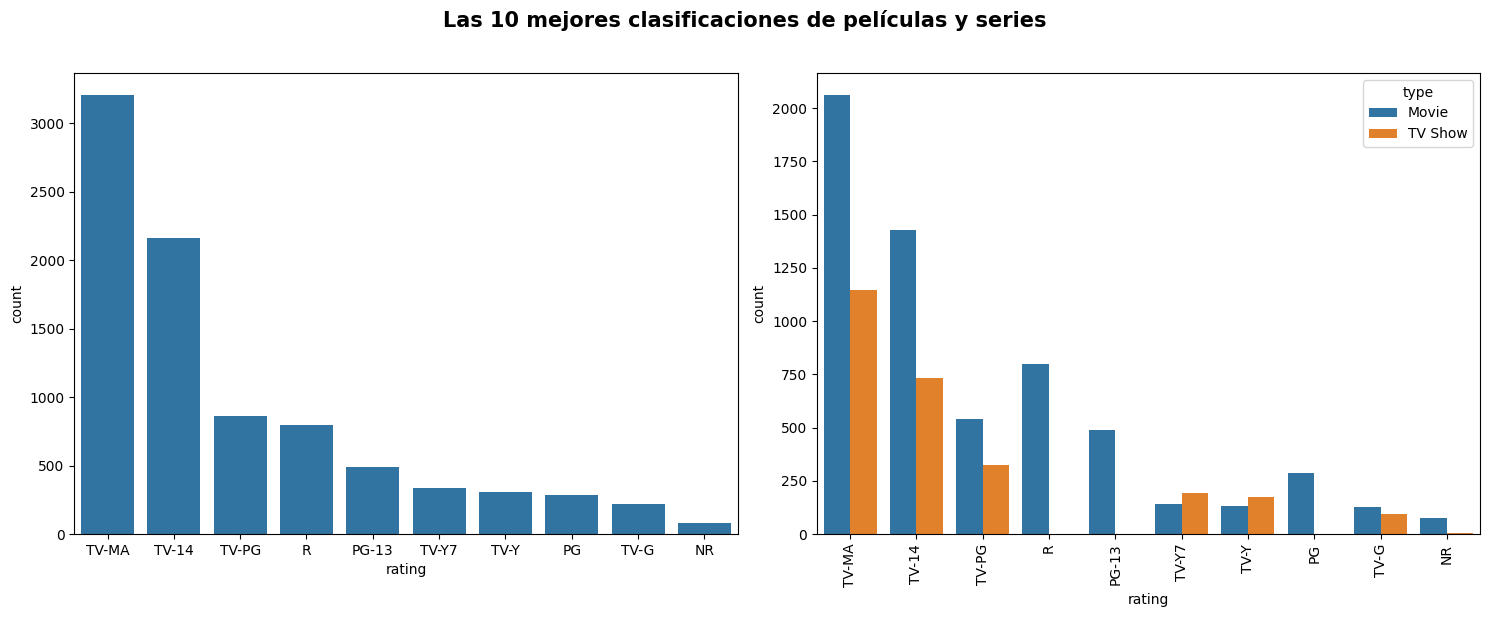

In [34]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Las 10 mejores clasificaciones de películas y series', weight='bold', y=1.02, size=15)

# Analisis univariado
sns.countplot(x="rating", data=netflix_titles, order=netflix_titles['rating'].value_counts().index[0:10], ax=ax[0])

# Analisis bivariado
graph = sns.countplot(x="rating", data=netflix_titles, hue='type', order=netflix_titles['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Listando los g&eacute;neros m&aacute;s vistos tanto en pel&iacute;culas como en series de televisi&oacute;n vemos que las peliculas internacionales son las que mas predominan seguida de las dram&aacute;ticas y por &uacute;ltimo las comedias, siendo estas 3 las m&aacute;s populares en la plataforma.

In [35]:
# Separar el género de las columnas list_in para su análisis
genres = netflix_titles['listed_in'].str.split(', ', expand=True).stack()

# Los 10 géneros más vistos en películas y series de televisión
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head()

,genre,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869


Para hacer m&aacute;s visual el top 10 de los g&eacute;neros m&aacute; populares en netflix se generaron gr&aacute;ficas para representar lo m&aacute; popular tanto en pel&iacute;culas y series de televisi&oacute;n, adem&aacute; de los g&eacute;neros que han sido populares &uacute;ltimamente. 

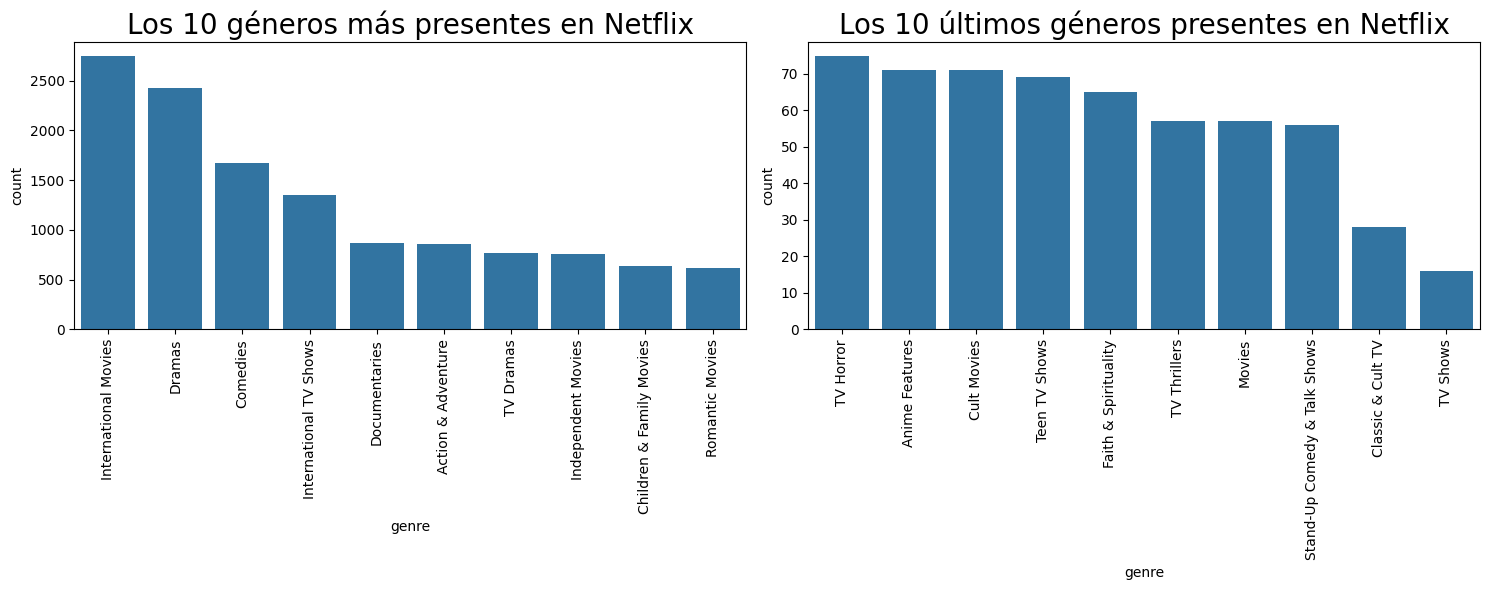

In [36]:
# Gráfica 
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Top 10 en generos
top = sns.barplot(x='genre', y = 'count', data=genres[:10], ax=ax[0])
top.set_title('Los 10 géneros más presentes en Netflix', size=20)
plt.setp(top.get_xticklabels(), rotation=90)

# Ultimos 10 generos
bottom = sns.barplot(x='genre', y = 'count', data=genres[-10:], ax=ax[1])
bottom.set_title('Los 10 últimos géneros presentes en Netflix', size=20)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Limpieza de Datos

Para poder hacer una limpieza primero tenemos que conocer y analizar los datos para ver como esta conformada y as&iacute; buscar el m&eacute;todo m&aacute;s eficiente de limpieza.

In [37]:
netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Cuando encontramos información que se repite en nuestro conjunto de datos, la llamamos 'duplicación' y podemos apreciar que el conjunto de datos no tiene elementos duplicados.

In [38]:
netflix_titles.duplicated().sum()

0

Hay que visualizar cu&aacute;nto es el porcentaje de datos faltantes, d&aacute;ndonos cuenta as&iacute; que la columna del director tiene un 30% de datos faltantes y, tanto la columna cast y country tienen un 9% de datos faltantes. Fuera de estas columnas, las dem&aacute;s no tienen un n&uacute;mero significativo de datos faltantes.

In [39]:
# examining missing values
print("Missing values distribution: ")
print(netflix_titles.isnull().mean())
print("")

Missing values distribution: 
show_id         0.000000
type            0.000000
title           0.000000
director        0.299080
cast            0.093675
country         0.094357
date_added      0.001135
release_year    0.000000
rating          0.000454
duration        0.000341
listed_in       0.000000
description     0.000000
dtype: float64



En algunas ocasiones faltan muchos valores en los datos reales, por lo cual, los datos corruptos o faltantes pueden dar lugar a valores omitidos. 

In [93]:
print(netflix_titles.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [40]:
# Tratamiento de valores perdidos 
netflix_titles[['director','cast','country']] = netflix_titles[['director','cast','country']].fillna(' ')
netflix_titles.dropna(axis=0, inplace=True)

In [41]:
#Se checa si todos los valores son nulos despues de tratarlos.
netflix_titles.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [42]:
# Vemos las dimensiones del conjunto de datos
netflix_titles.shape

(8790, 12)

## Extracci&oacute;n de Caracter&iacute;sticas

Para el proceso de extracci&oacute;n de caracter&iacute;sticas se planea limpiar, organizar y normalizar los datos para as&iacute; analizarlos f&aacute;cilmente para los modelos de aprendizaje autom&aacute;tico.

In [43]:
# Se crea un objeto de la función stemming
stemmer = SnowballStemmer("english")

# Se define una función para aplicar el stemming utilizando SnowballStemmer
def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [44]:

netflix_titles.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [45]:
# Se crea una columna de etiquetas utilizando todas las columnas de texto.
netflix_titles['text_data'] = netflix_titles['director'] + netflix_titles['cast'] + netflix_titles['country'] + \
                     netflix_titles['rating'] + netflix_titles['listed_in'] + netflix_titles['description']
     

In [46]:
# Se comprueba la primera fila
netflix_titles['text_data'][0]

'Kirsten Johnson United StatesPG-13DocumentariesAs her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'

In [47]:
# Conjunto de stop words en inglés
stop_words = stopwords.words('english')

# Mostrar stopwords
np.array(stop_words)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [50]:
def stopwords(text):
    '''una función para eliminar el stopword y poner en minúsculas cada palabra'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # Unir la lista de palabras con el separador de espacios
    return " ".join(text)

In [49]:
# Aplicación de la función de stopword.
netflix_titles['text_data'] = netflix_titles['text_data'].apply(stopwords)

In [23]:
# Comprobando de nuevo la primera fila
netflix_titles['text_data'][0]

'kirsten johnson united statespg-13documentariesas father nears end life, filmmaker kirsten johnson stages death inventive comical ways help face inevitable.'

In [51]:
def remove_punctuation(text):
    '''una función para eliminar los signos de puntuación'''
    import string
    # Sustituir los signos de puntuación por ningún espacio, lo que de hecho suprime los signos de puntuación.
    translator = str.maketrans('', '', string.punctuation)
    # Devuelve el texto sin signos de puntuación
    return text.translate(translator)

In [25]:
# Se aplica la función remove_punctuation
netflix_titles['text_data'] = netflix_titles['text_data'].apply(remove_punctuation)

In [26]:
# Se comprueba la primera fila después del proceso
netflix_titles['text_data'][0]

'kirsten johnson united statespg13documentariesas father nears end life filmmaker kirsten johnson stages death inventive comical ways help face inevitable'

In [27]:
# Se crea un objeto de la función stemming
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''una función que corta cada palabra del texto dado'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [28]:
# Se aplica la función stemming
netflix_titles['text_data'] = netflix_titles['text_data'].apply(stemming)

In [29]:
# Se comprueba la primera fila después del proceso
netflix_titles['text_data'][0]

'kirsten johnson unit statespg13documentariesa father near end life filmmak kirsten johnson stage death invent comic way help face inevit'

In [30]:

# Se crea el objeto del vectorizador tfid
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 para evitar que el sistema se bloquee

# Se ajusta el vectorizador utilizando los datos de texto
tfidf.fit(netflix_titles['text_data'])

# Se recopilan los elementos de vocabulario utilizados en el vectorizador
dictionary = tfidf.vocabulary_.items()

In [31]:
print(len(dictionary)) # Número de características independientes creadas a partir de la columna "text_data"

10000


In [32]:

# Se convierte el vector en matriz para la agrupación
vector = tfidf.transform(netflix_titles['text_data']).toarray()

# Se resume el vector codificado
print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (8790, 10000)
datatype : <class 'numpy.ndarray'>


## Reducci&oacute;n de dimensionalidad

In [33]:
# Uso del PCA para reducir la dimensionalidad
pca = PCA(random_state=42)
pca.fit(vector)


PCA(random_state=42)

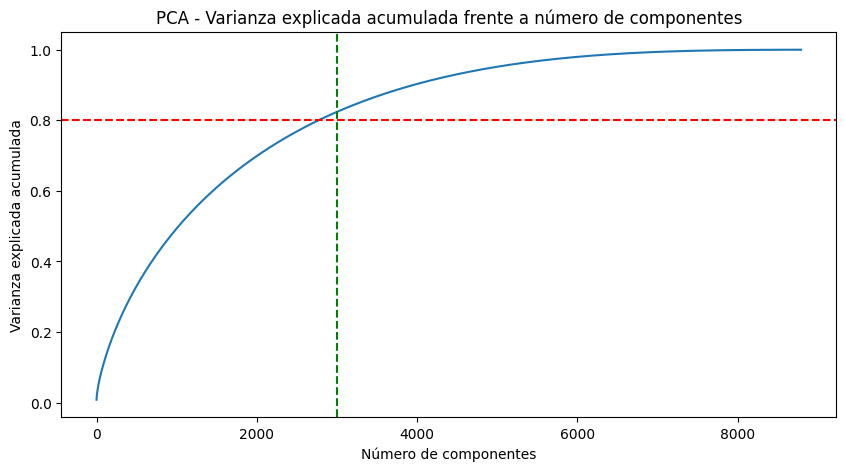

In [34]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Varianza explicada acumulada frente a número de componentes')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()

In [35]:
# Reducción de las dimensiones a 3000 mediante PCA
pca = PCA(n_components=3000, random_state=42)
pca.fit(vector)

PCA(n_components=3000, random_state=42)

In [36]:
# Características transformadas
X = pca.transform(vector)

In [37]:
# Forma de los vectores transformados
X.shape

(8790, 3000)

# Conclusi&oacute;n en base a los datos

Gracias a la limpieza de datos podemos ver que los datos NaN en la columna de directos pasaron a un tener un valor vac&iacute;o, se separ&oacute;respectivamente los datos para tener dos conjuntos de datos distintos, uno ser&aacute; para las series de televisi&oacute;n y otro para pel&iacute;culas, simplificando el problema de la duraci&oacute;n

In [53]:
netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,text_data
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",kirsten johnson united statespg-13documentarie...
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","ama qamata, khosi ngema, gail mabalane, thaban..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"julien leclercqsami bouajila, tracy gotoas, sa..."
3,s4,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","tv-madocuseries, reality tvfeuds, flirtations ..."
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"mayur more, jitendra kumar, ranjan raj, alam k..."


En base a los datos que fueron previamente limpiados podemos ver que los datos que contenian NaN fueron cambiados a " ", dejando as&iacute; vac&iacute;os los campos, ya que en s&iacute; no afecta esto al conjunto.

Adem&aacute;s podemos ver que se cre&oacute; una &uacute;ltima columna llamada "text_data" la cual son las palabras claves que se obtuvieron por medio de limpiar, organizar y normalizar los datos para as&iacute; analizarlos a profundidad.

Por lo cual los datos en la extracci&oacute;n se aumento el n&uacute;mero de columnas en uno m&aacute;s para as&iacute; poder guardar la palabras clave en ella, de igual manera el n&uacute;mero de la forma del conjunto de datos aumento pero por medio de PCA se pudo reducir de nuevo para poder trabajar con los datos.